##                         HEART ATTACK PREDICTION

Columns Names and Deatils
age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Devesh Atole\Desktop\ML\MLearing data\Heartattack_predition\heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape   ## THERE ARE 303 ROWS AND 14 COLUMNS

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## CHECKING UNIQUE VALUES 
dict1={}
for i in df.columns:
    dict1[i]= df[i].value_counts().shape[0]
print(dict1)

{'age': 41, 'sex': 2, 'cp': 4, 'trtbps': 49, 'chol': 152, 'fbs': 2, 'restecg': 3, 'thalachh': 91, 'exng': 2, 'oldpeak': 40, 'slp': 3, 'caa': 5, 'thall': 4, 'output': 2}


In [8]:
df.isna().sum()             ## THERE ARE NO EMPTY RECORD

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## EDA

<Figure size 800x500 with 0 Axes>

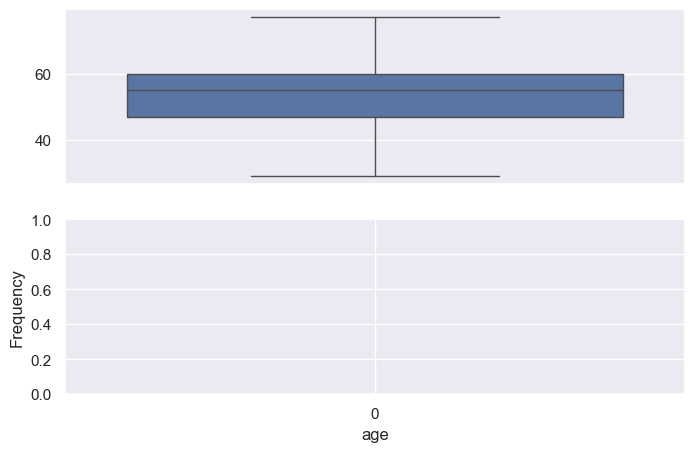

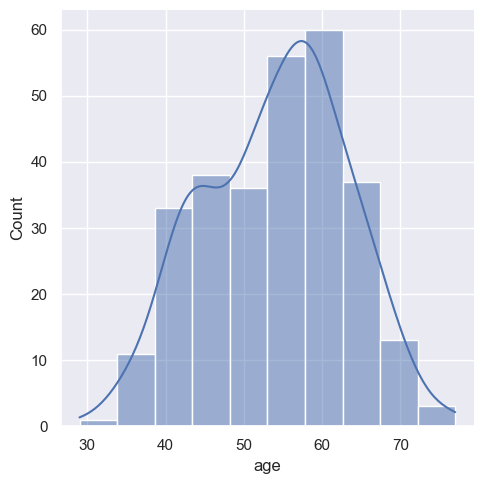

<Figure size 800x500 with 0 Axes>

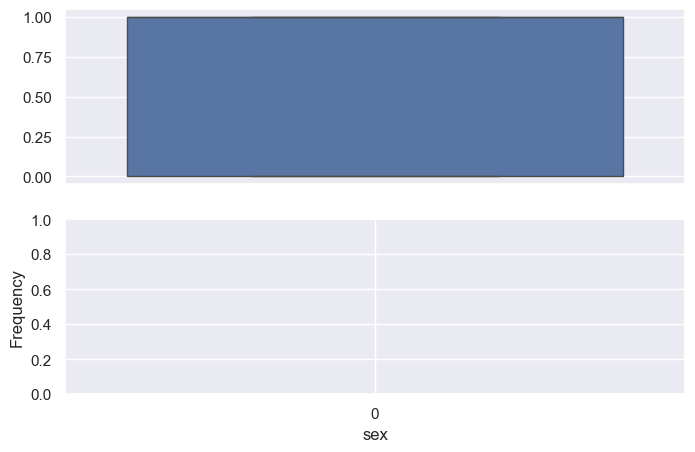

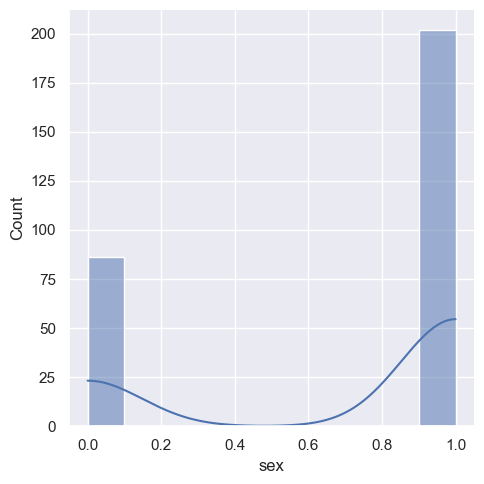

<Figure size 800x500 with 0 Axes>

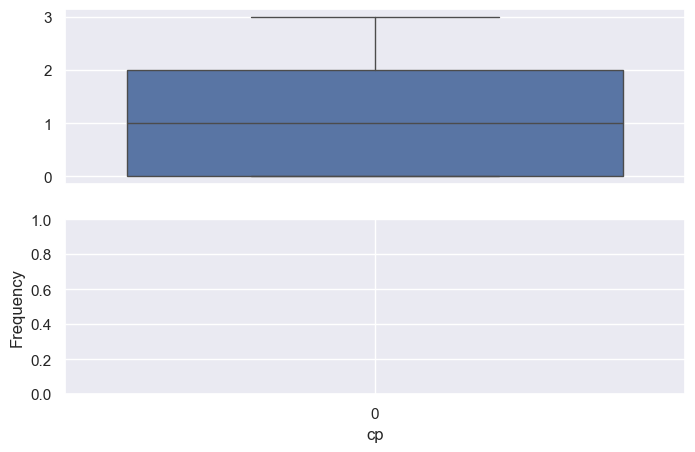

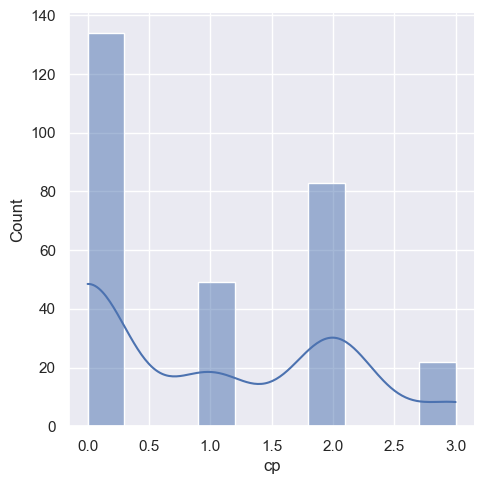

<Figure size 800x500 with 0 Axes>

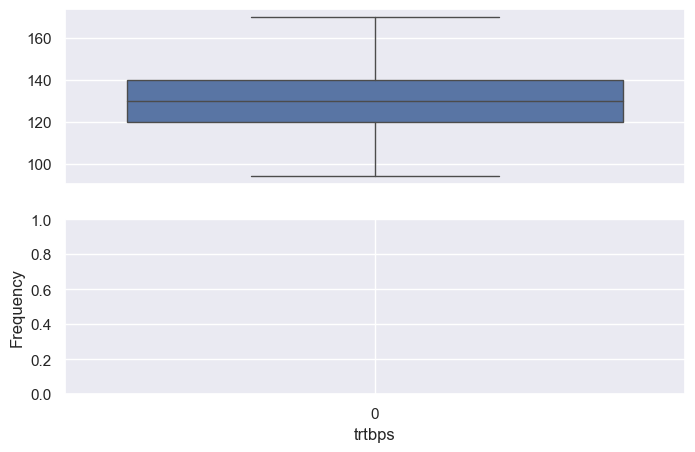

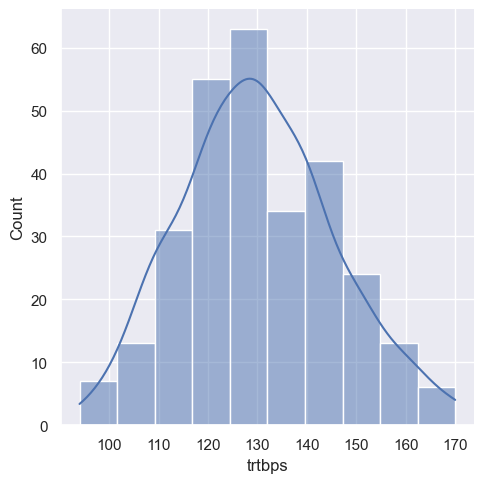

<Figure size 800x500 with 0 Axes>

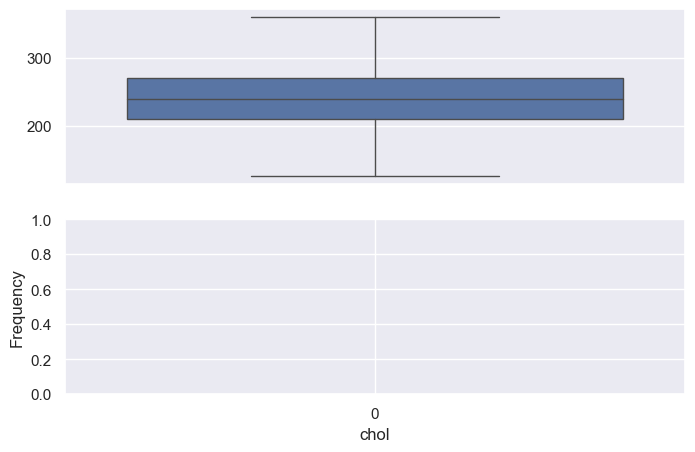

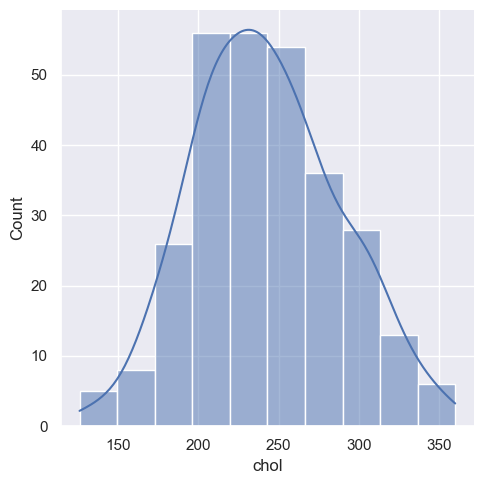

<Figure size 800x500 with 0 Axes>

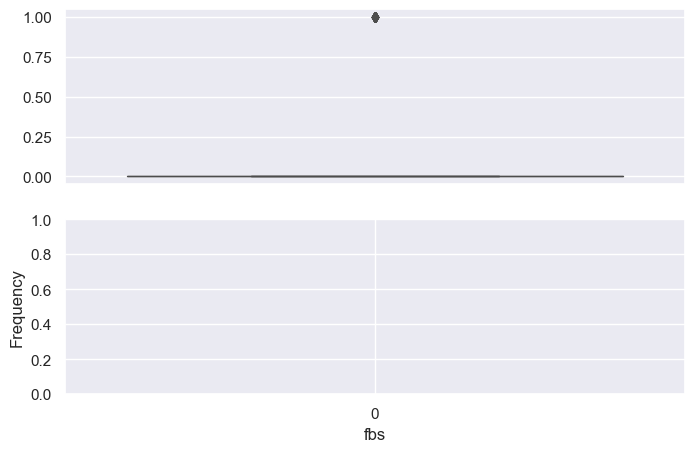

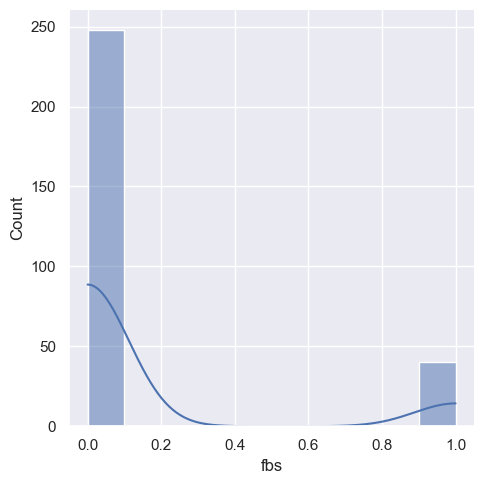

<Figure size 800x500 with 0 Axes>

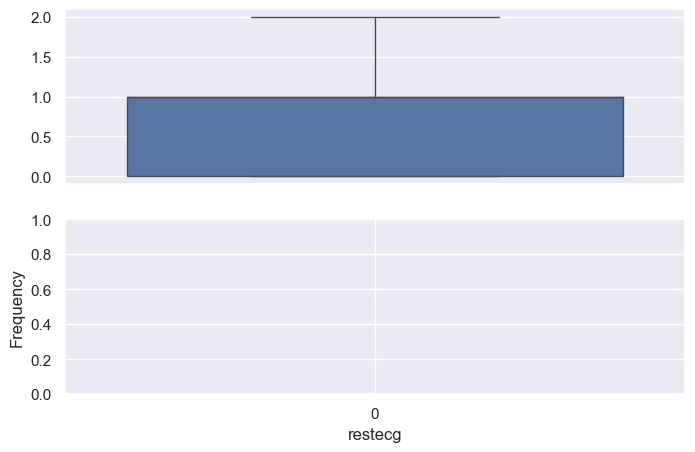

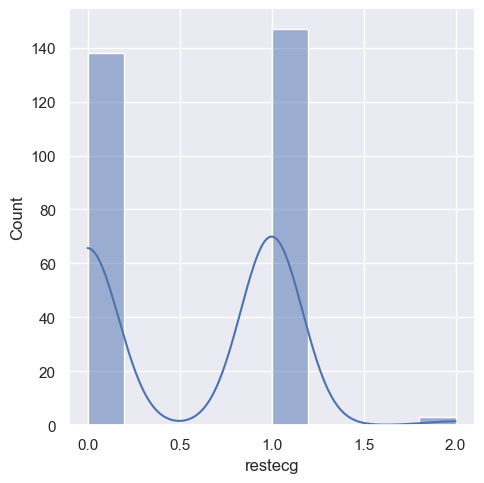

<Figure size 800x500 with 0 Axes>

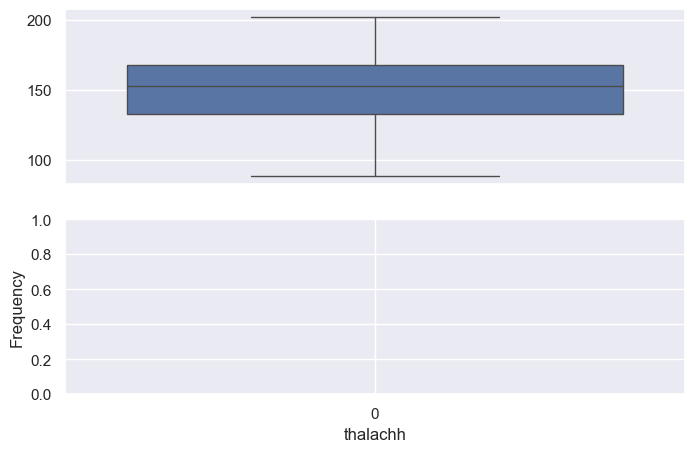

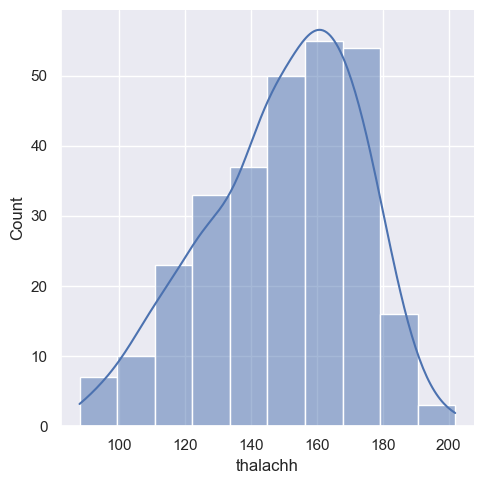

<Figure size 800x500 with 0 Axes>

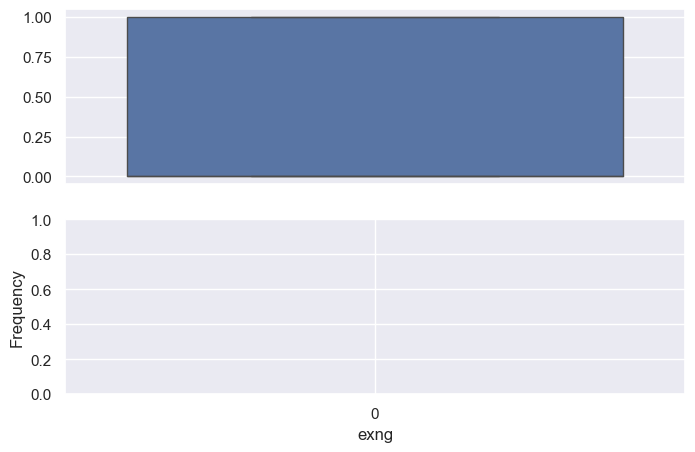

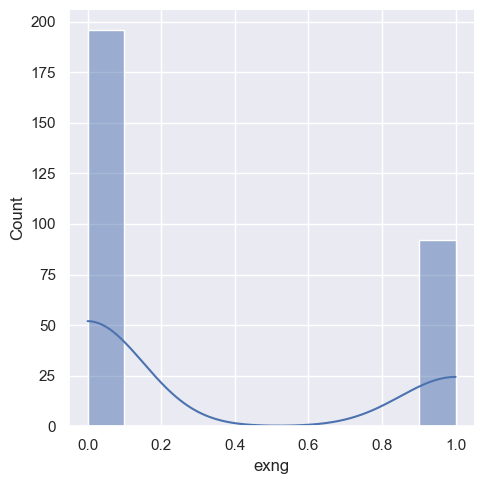

<Figure size 800x500 with 0 Axes>

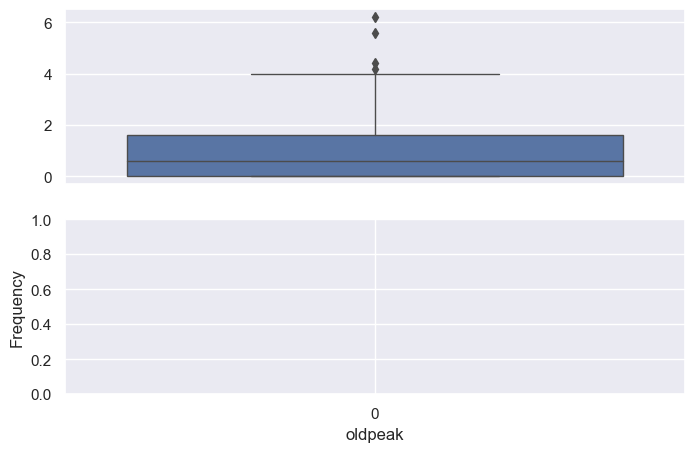

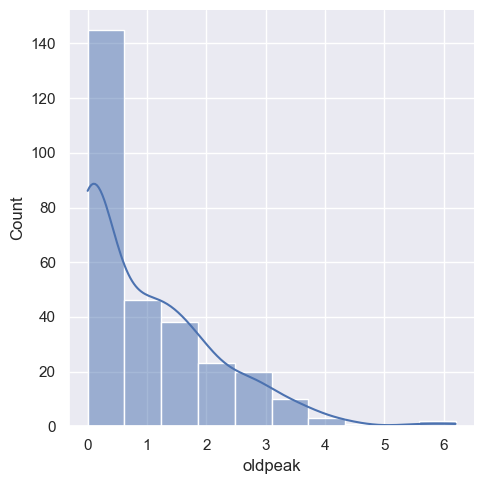

<Figure size 800x500 with 0 Axes>

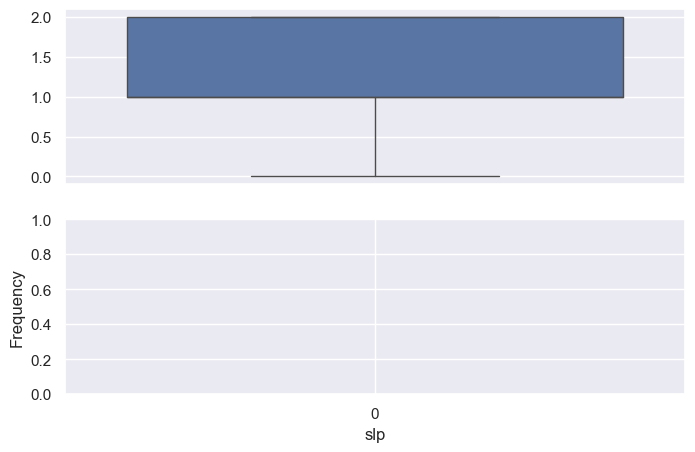

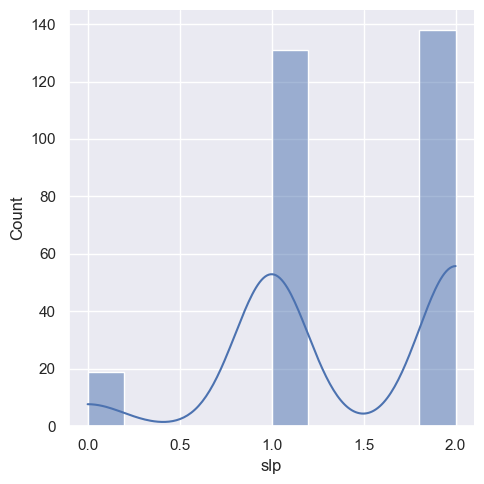

<Figure size 800x500 with 0 Axes>

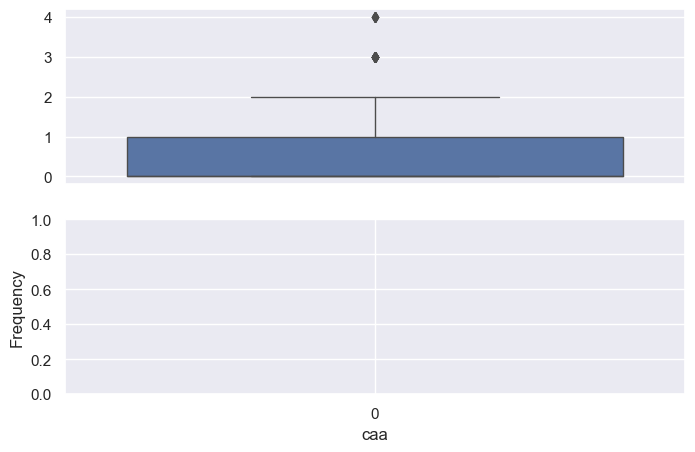

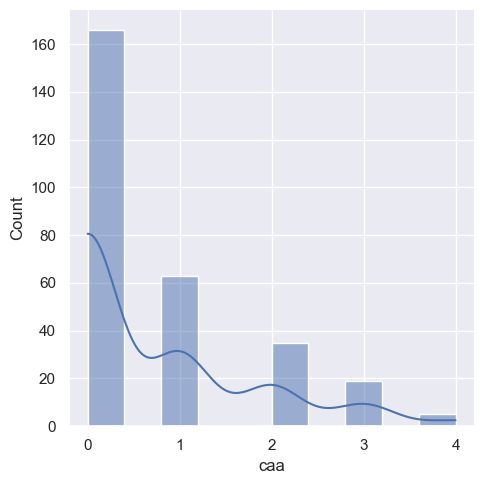

<Figure size 800x500 with 0 Axes>

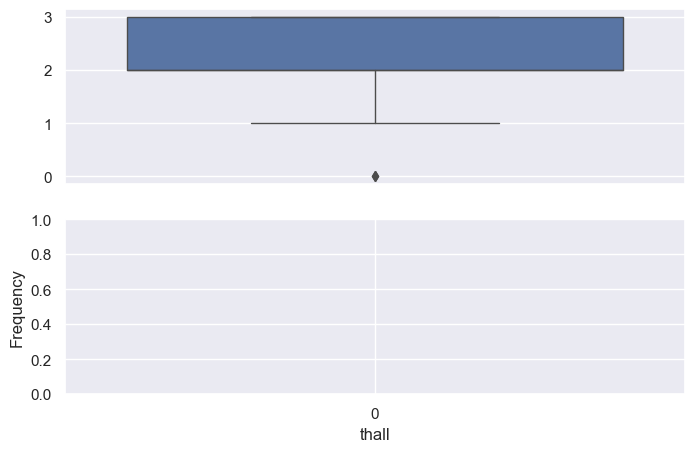

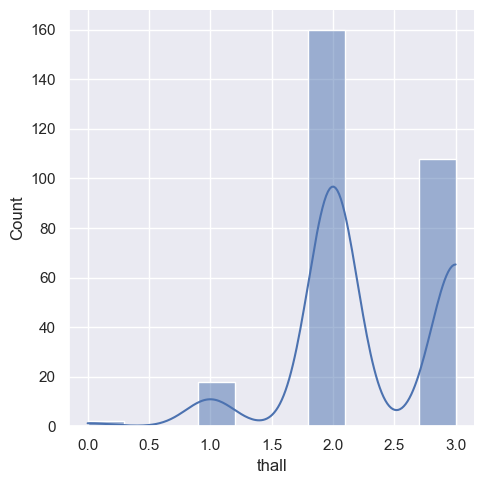

<Figure size 800x500 with 0 Axes>

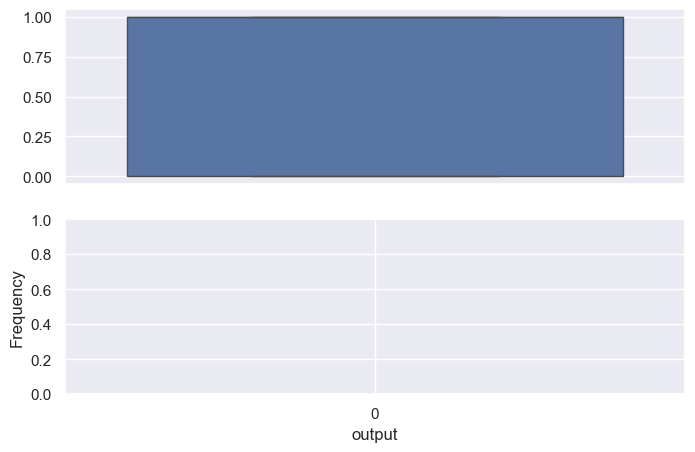

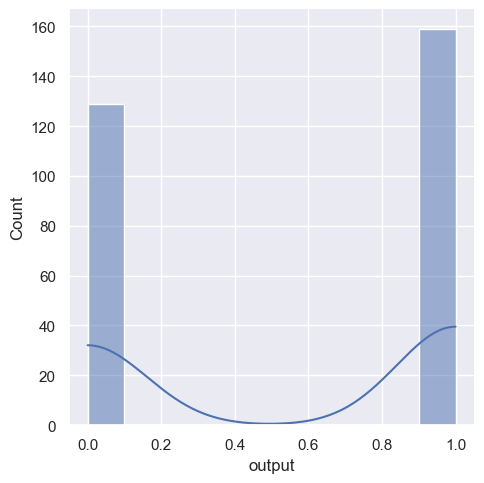

In [26]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.displot(df[i], ax=ax_hist , bins = 10,kde=True)

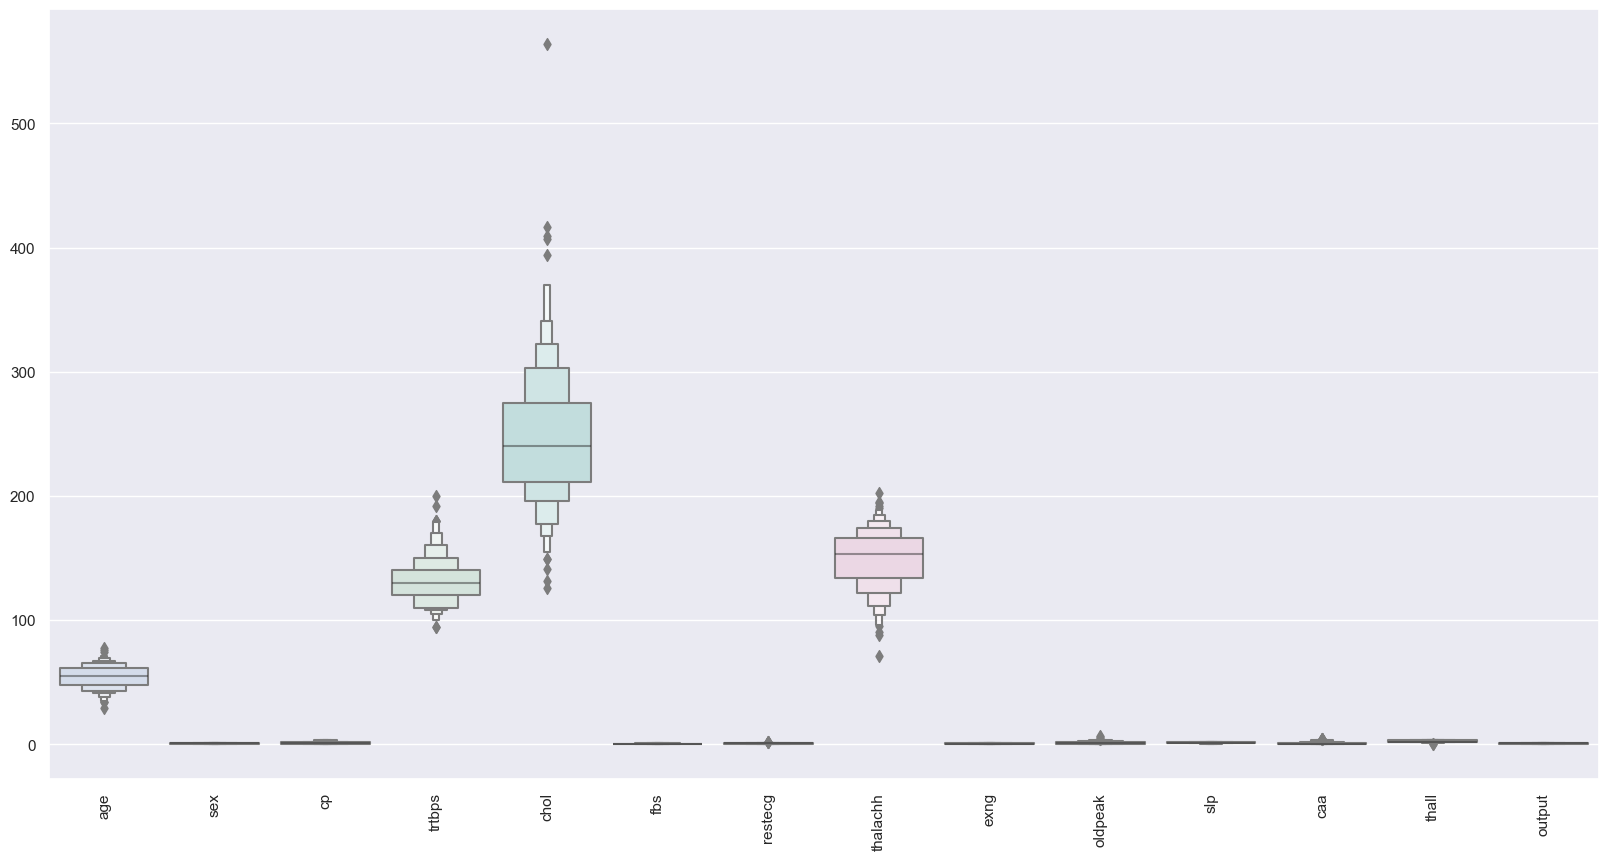

In [17]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colours)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='trtbps'>

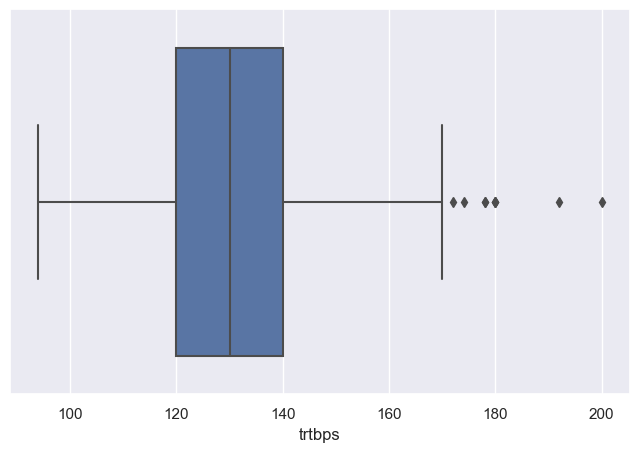

In [18]:
sns.boxplot(data=df,x="trtbps")

90.0 170.0


<Axes: xlabel='trtbps'>

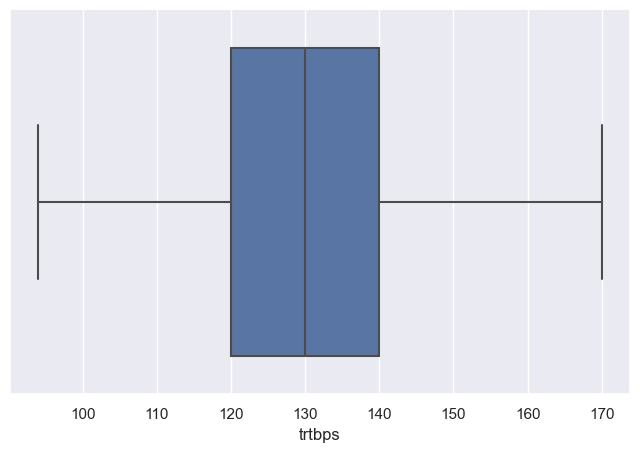

In [19]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['trtbps'], 25)
Q3 = np.percentile(df['trtbps'], 75)
IQR = Q3 - Q1
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
# remove the outliers
df = df[(df['trtbps'] >= lower_limit) & (df['trtbps'] <= upper_limit)]
sns.boxplot(data=df,x="trtbps")       ## After removing outliers 

<Axes: xlabel='chol'>

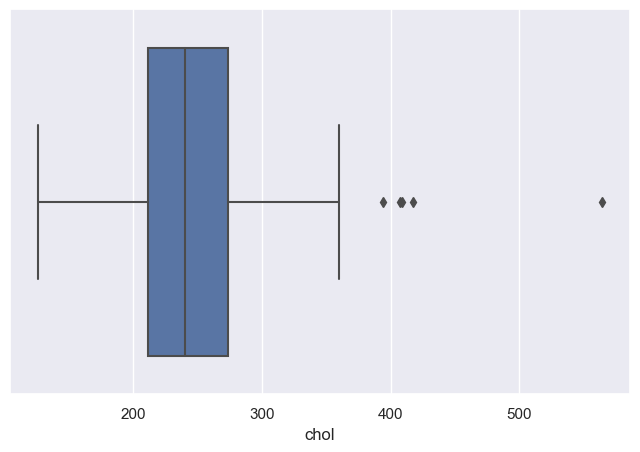

In [20]:
sns.boxplot(data=df,x="chol") 

116.875 367.875


<Axes: xlabel='chol'>

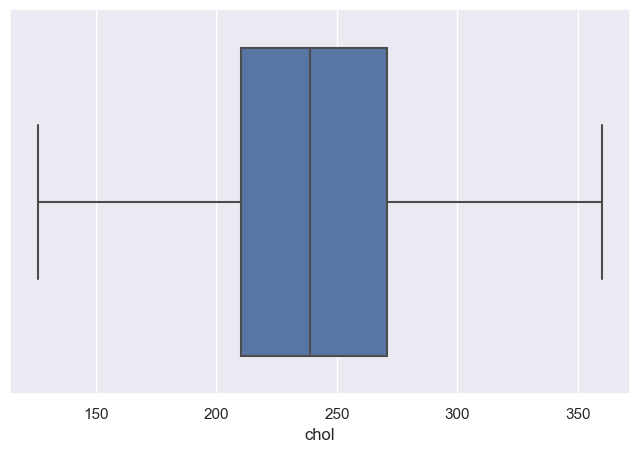

In [21]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3 - Q1
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
# remove the outliers
df = df[(df['chol'] >= lower_limit) & (df['chol'] <= upper_limit)]
sns.boxplot(data=df,x="chol")       ## After removing outliers 

<Axes: xlabel='thalachh'>

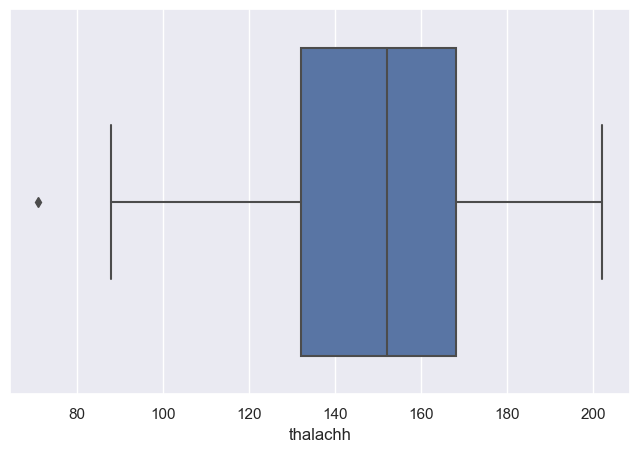

In [22]:
sns.boxplot(data=df,x="thalachh")

78.0 222.0


<Axes: xlabel='thalachh'>

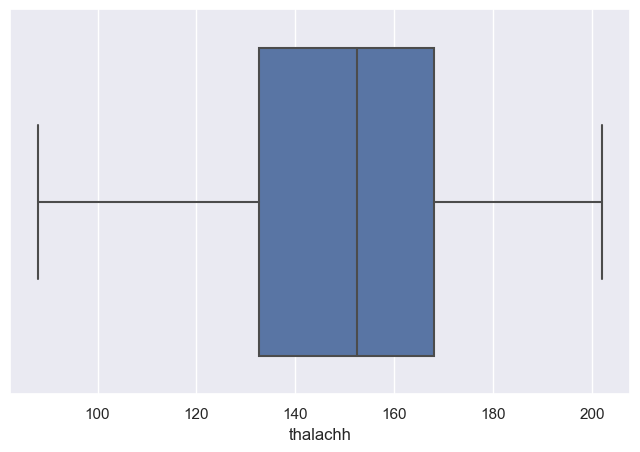

In [23]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['thalachh'], 25)
Q3 = np.percentile(df['thalachh'], 75)
IQR = Q3 - Q1
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
# remove the outliers
df = df[(df['thalachh'] >= lower_limit) & (df['thalachh'] <= upper_limit)]
sns.boxplot(data=df,x="thalachh")       ## After removing outliers 

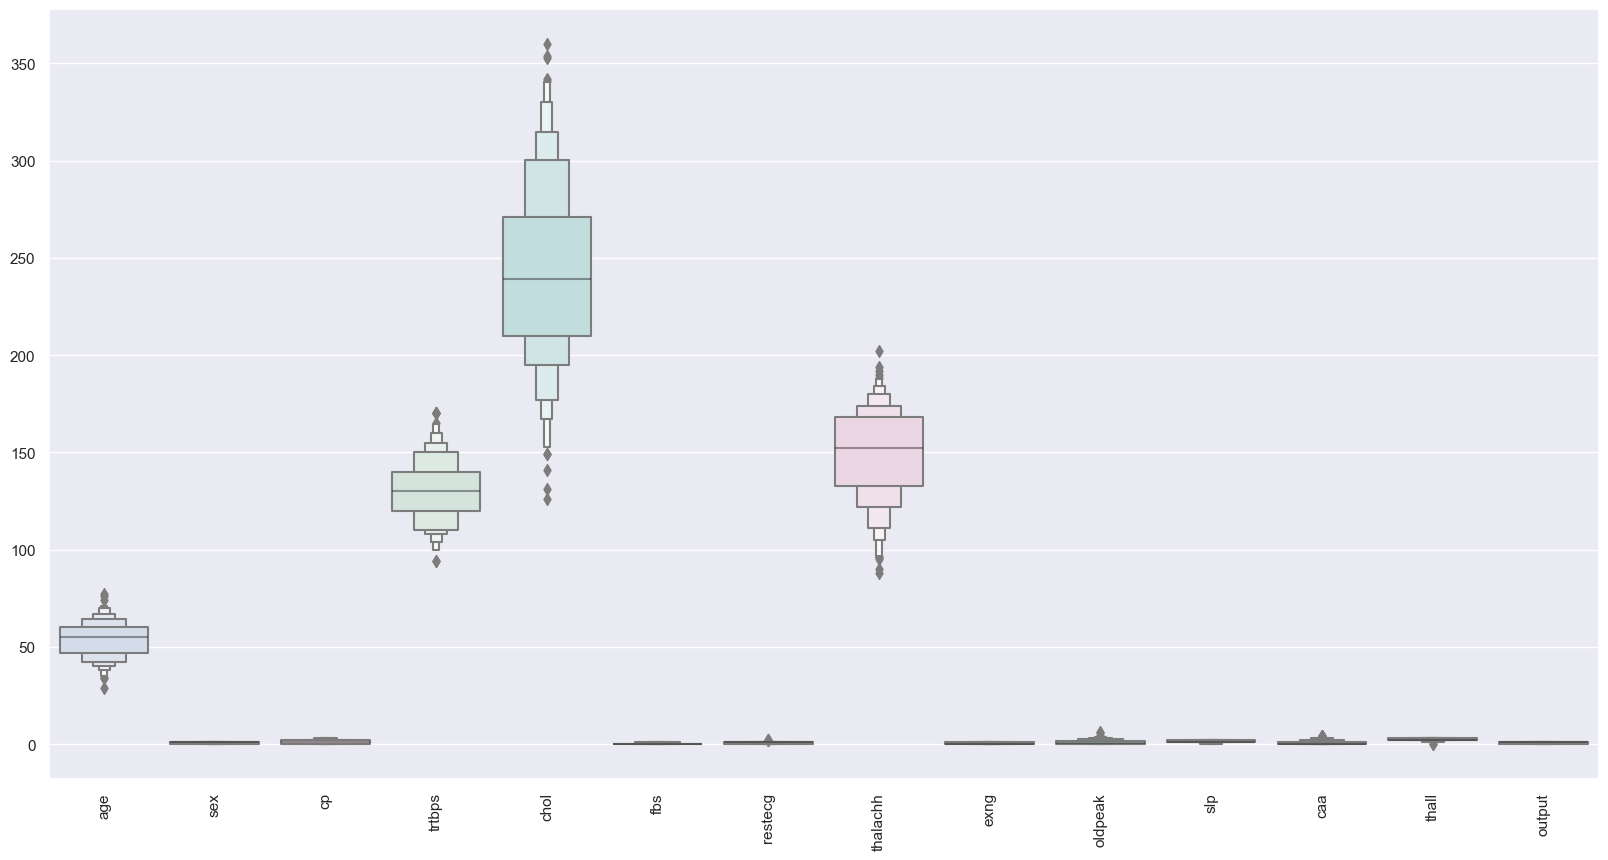

In [24]:
 #Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colours)
plt.xticks(rotation=90)
plt.show()

<Axes: >

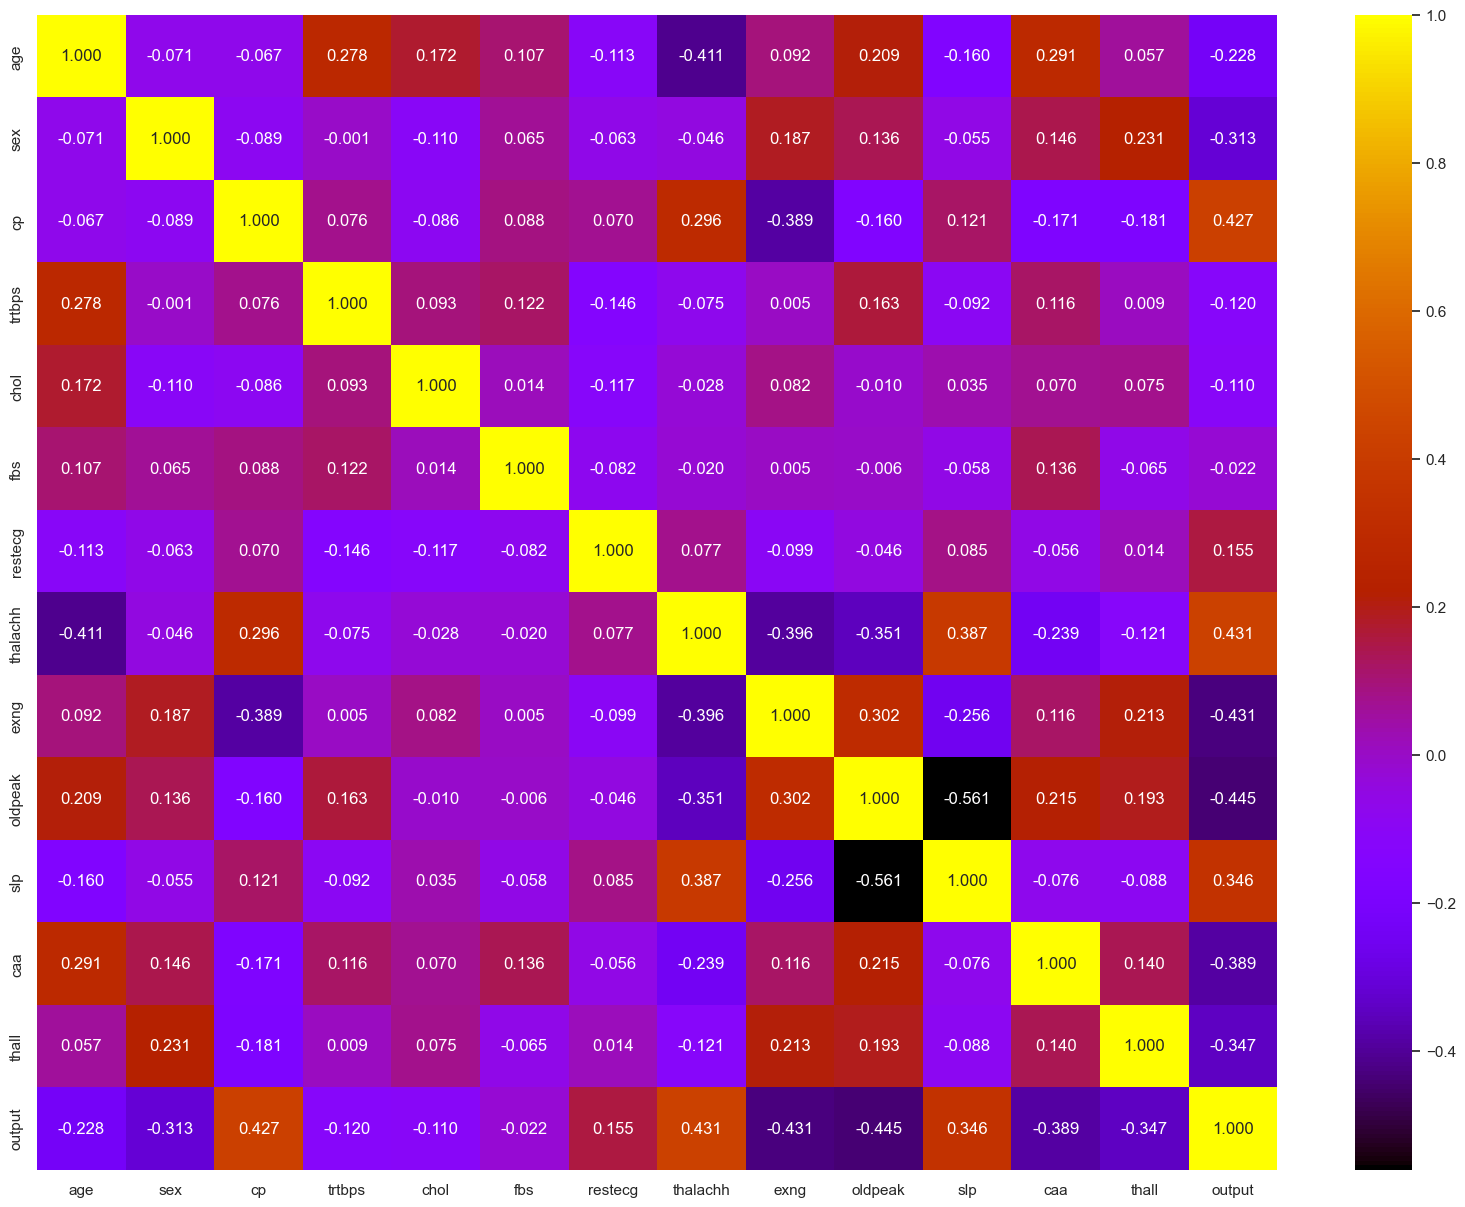

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='.3f',cmap='gnuplot')   ## To see Co-reletion by heatmap visulaizatin

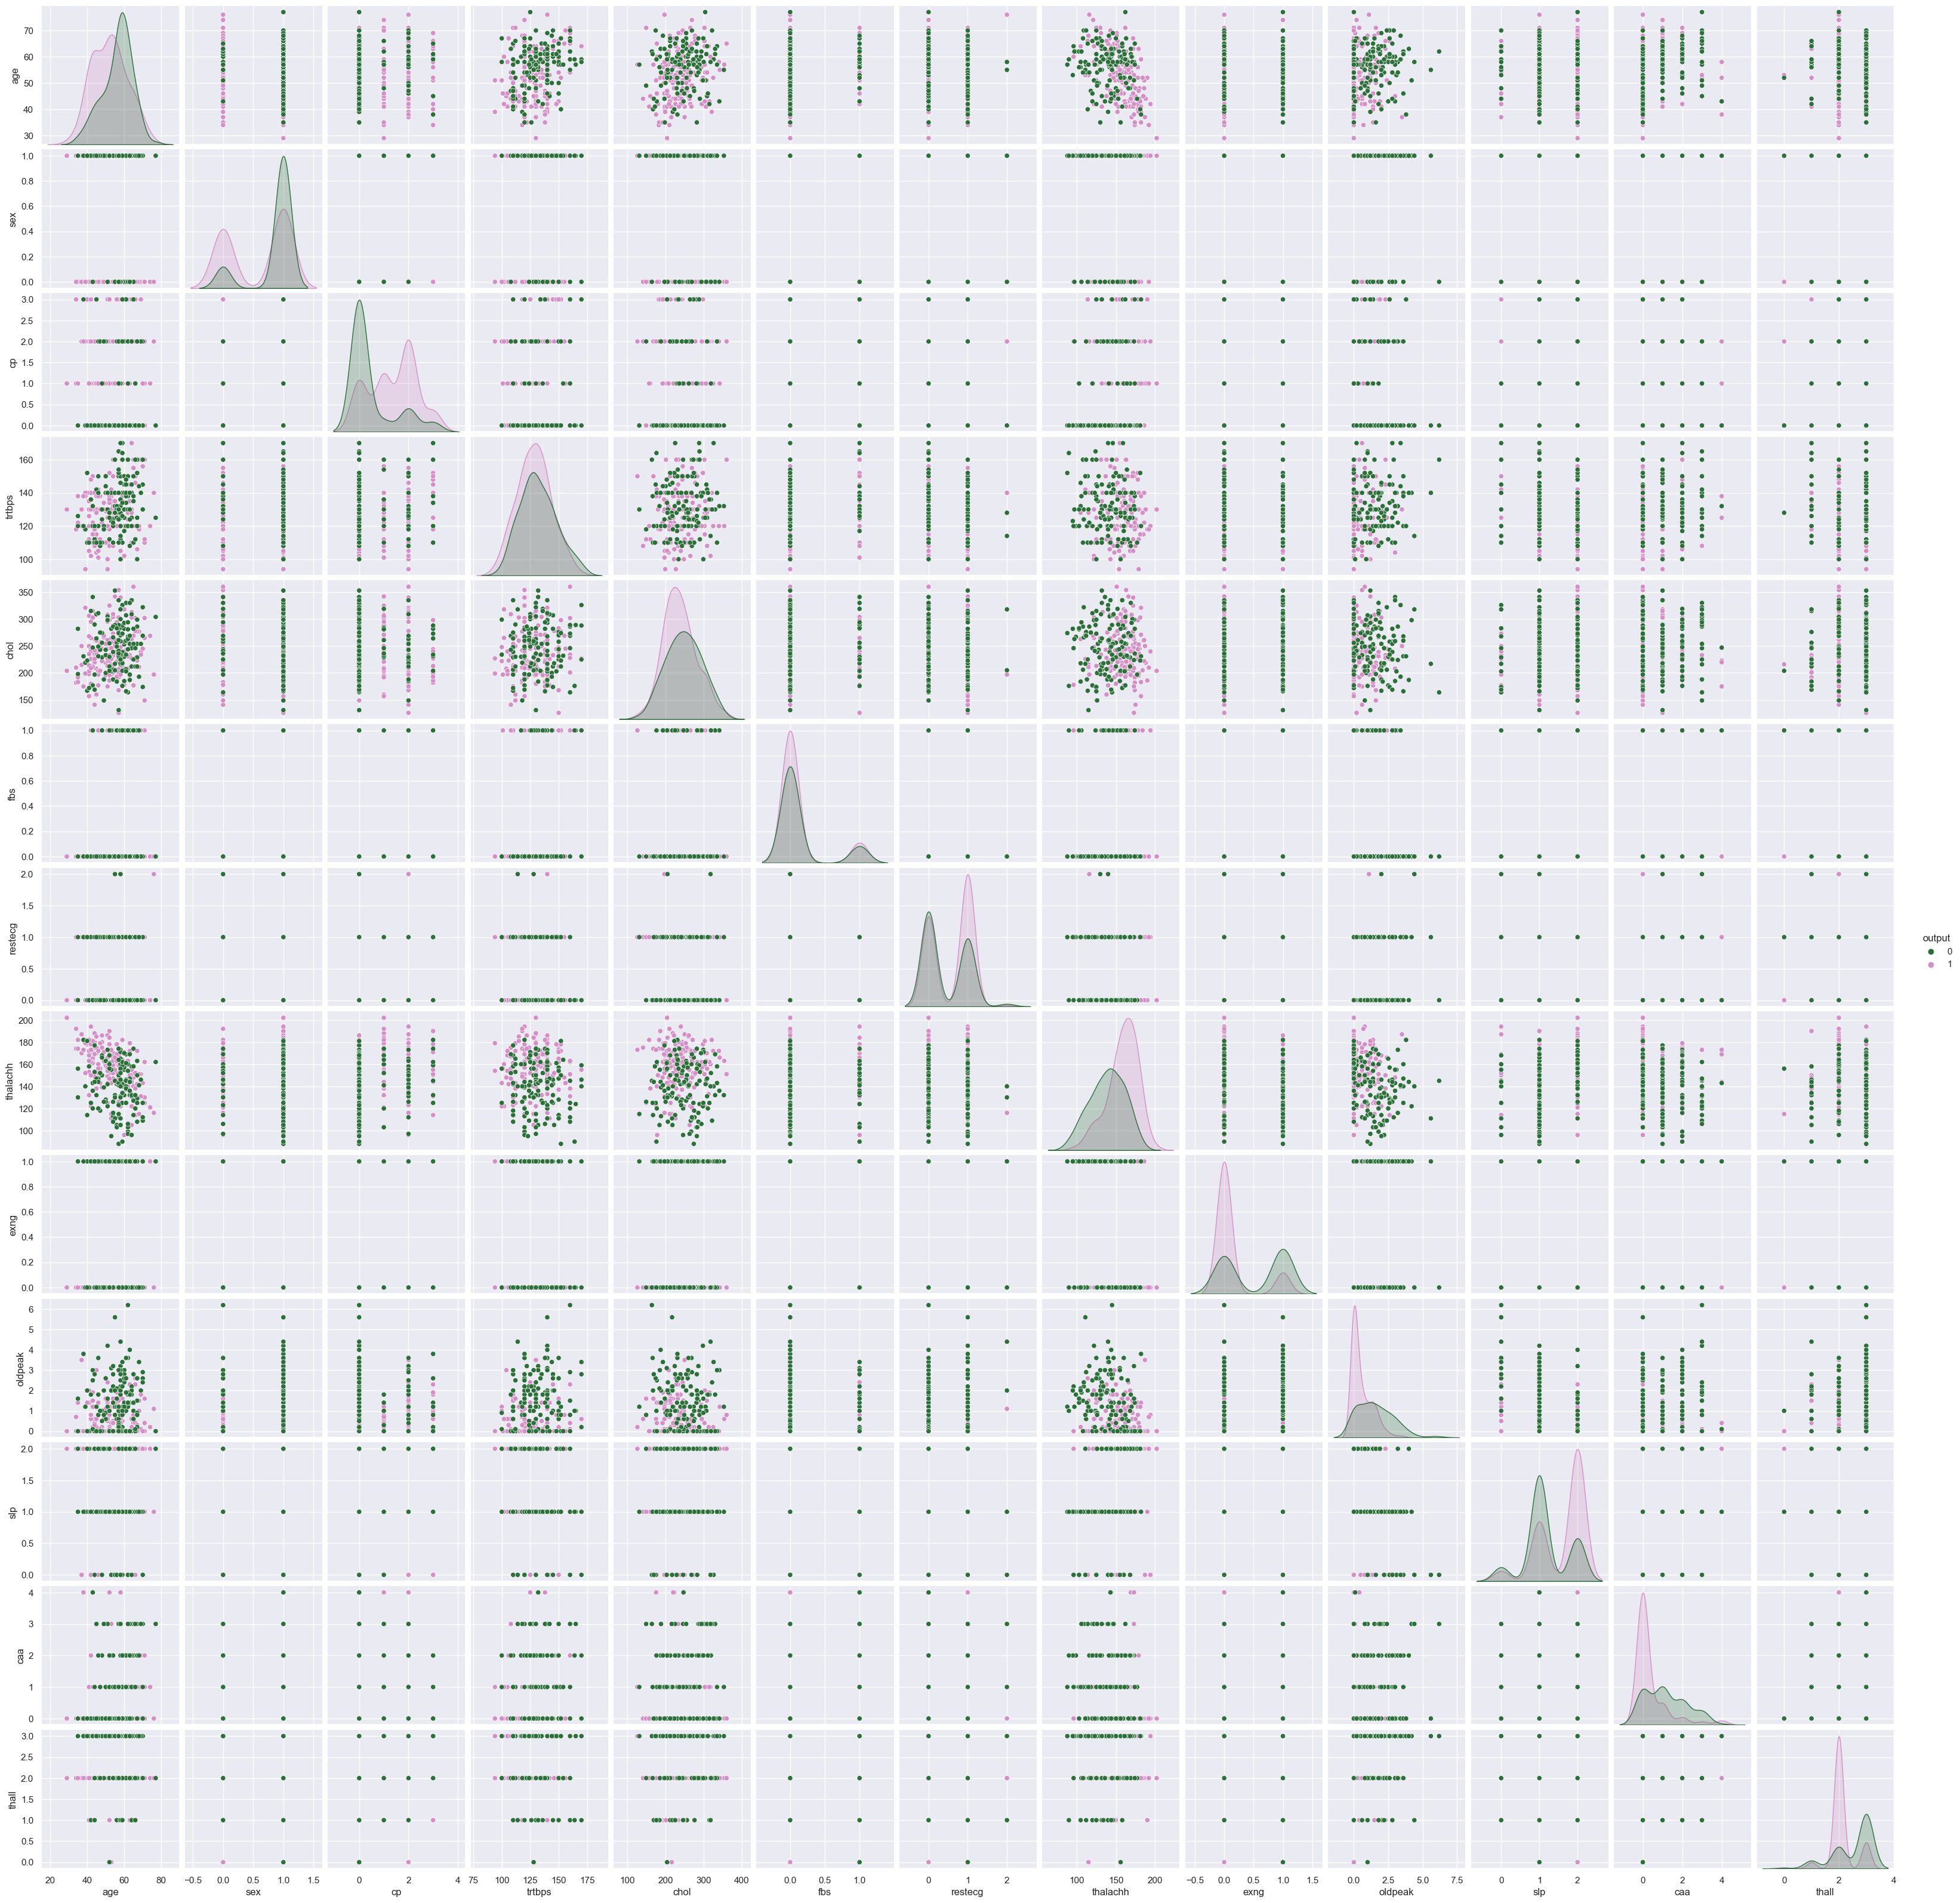

In [31]:
sns.pairplot(df,hue='output',palette = "cubehelix")
plt.show()

In [33]:
y=df["output"]
X=df.drop("output",axis=1)

In [35]:
# Scaling
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
from sklearn.model_selection import train_test_split


In [36]:
RS.fit_transform(X)

array([[ 0.61538462,  0.        ,  1.        , ..., -1.        ,
         0.        , -1.        ],
       [-1.38461538,  0.        ,  0.5       , ..., -1.        ,
         0.        ,  0.        ],
       [-1.07692308, -1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        , -0.5       , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.15384615,  0.        , -0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.15384615, -1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier
ADB=AdaBoostClassifier()
from sklearn.svm import LinearSVC
LSVM=LinearSVC()
# Metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [42]:
logistic_model=lgr.fit(X_train,y_train)                 #### ## BY Logistic Regression MODEL ACCURACY IS 90%
y_pred=logistic_model.predict(X_test)

In [45]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.896551724137931
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.90      0.90      0.90        31

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58

[[24  3]
 [ 3 28]]


In [47]:
LSVM=LinearSVC(dual=False,random_state=250)         ## ## BY Linier support vector MODEL ACCURACY IS 86.20%
LSVM=LinearSVC(dual=False,random_state=250)         
LSVM1=LSVM.fit(X_train,y_train)

In [48]:
y1=LSVM1.predict(X_test)

In [49]:
print(accuracy_score(y1,y_test))
print(classification_report(y1,y_test))
print(confusion_matrix(y1,y_test))

0.8620689655172413
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.90      0.85      0.88        33

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.87      0.86      0.86        58

[[22  3]
 [ 5 28]]


In [50]:
adb=AdaBoostClassifier()
abd_model=adb.fit(X_train,y_train)     

In [52]:
Y_pred_byABD=abd_model.predict(X_test)                            ## BY AdaBoostClassifier MODEL ACCURACY IS 79.32%
print(accuracy_score(Y_pred_byABD,y_test))
print(confusion_matrix(Y_pred_byABD,y_test))

print(classification_report(Y_pred_byABD,y_test))

0.7931034482758621
[[22  7]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.77      0.83      0.80        29

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.79      0.79      0.79        58



In [62]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred_DT = dt.predict(X_test)

print(accuracy_score(y_pred_DT,y_test))
print(confusion_matrix(y_pred_DT,y_test))

print(classification_report(Y_pred_RF,y_test))

0.7413793103448276
[[22 10]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.81      0.89      0.85        28

    accuracy                           0.84        58
   macro avg       0.85      0.85      0.84        58
weighted avg       0.85      0.84      0.84        58



In [57]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)


gbt.fit(X_train,y_train)

y_pred_G = gbt.predict(X_test)


In [58]:
print(accuracy_score(y_pred_G,y_test))
print(confusion_matrix(y_pred_G,y_test))            ## ## BY GradientBoostingClassifier MODEL ACCURACY IS 84.50%

print(classification_report(y_pred_G,y_test))

0.8448275862068966
[[24  6]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.81      0.89      0.85        28

    accuracy                           0.84        58
   macro avg       0.85      0.85      0.84        58
weighted avg       0.85      0.84      0.84        58



In [60]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred_RF = rf.predict(X_test)

print(accuracy_score(y_pred_RF,y_test))
print(confusion_matrix(y_pred_RF,y_test))            ## ## BY RandomForestClassifier MODEL ACCURACY IS 88%

print(classification_report(y_pred_RF,y_test))

0.8793103448275862
[[24  4]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.87      0.90      0.89        30

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58

